In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle, Arrow, Patch
import matplotlib

import matplotlib.colors
matplotlib.colors.to_hex((0.5, 0.5, 0.5))

tab20c = plt.cm.tab20c.colors

(-2.0, 2.0)

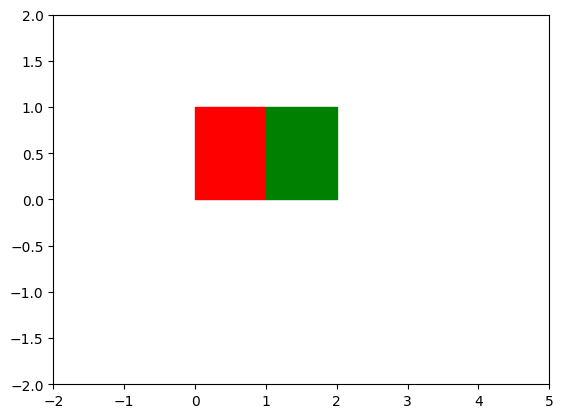

In [37]:
import matplotlib.patches

fig, ax = plt.subplots(1,1)

patchs = [
    Rectangle([0,0], 1, 1, color='r'),
    Rectangle([1,0], 1, 1, color='g'),
]
Collection = matplotlib.collections.PatchCollection(patchs, match_original=True)
i = ax.add_collection(Collection)
ax.set_xlim(-2,5)
ax.set_ylim(-2,2)

In [27]:
Collection

In [39]:
matplotlib.rc("mathtext", default="regular")
matplotlib.rc("figure", dpi=200)
matplotlib.rc("font", family="Arial")
matplotlib.rcParams["mathtext.default"]
figure_width       = 15/2.53999863
figure_height      = 4/2.53999863

fontsize_legend    = 8
fontsize_label     = 8
markersize_trigger = 80

color_facecolor      = "#ffffff"
color_label          = "#666666"
color_text           = "#ffffff"
color_G              = "#6699CC"
color_F              = "#FF6666"
color_seg            = "#99CC99"
color_trigger        = "#555555"

linewidth            = 0.8
linewidth_marker     = 0.5

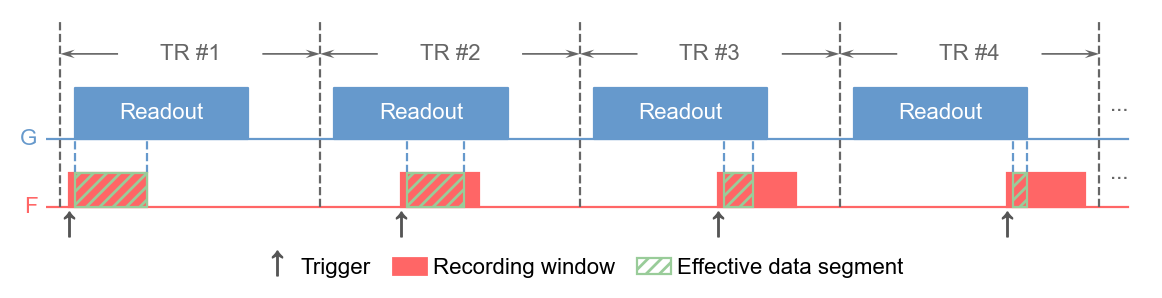

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(figure_width, figure_height), facecolor=color_facecolor)
y_G = 0.5
y_F = 0.3
h_G = 0.15
h_F = 0.1

# sequence 
nTR = 4
TR = 90
TE = 5
duration = 60
TRStarts = np.linspace(0, nTR*TR, nTR, endpoint=False)
ReadoutStarts = TRStarts + TE
# segments
duration_segs = [25, 20, 10, 5]
SegEnds = np.cumsum(duration_segs)
SegStarts = np.cumsum(duration_segs) - duration_segs
# field camera
delay = 2
CameraStarts = SegStarts - delay
CameraEnds = CameraStarts + np.max(duration_segs) + delay

# ax.scatter(1,0.3)
# 标签
ax.text(-8, y_G, 'G', fontsize=fontsize_label, color=color_G, verticalalignment='center', horizontalalignment='right')
ax.text(-8, y_F, 'F', fontsize=fontsize_label, color=color_F, verticalalignment='center', horizontalalignment='right')
# 绘制水平线 G 和 F
ax.add_line(Line2D([-5, nTR*TR+10], [y_F, y_F], linewidth=linewidth, color=color_F))
ax.add_line(Line2D([-5, nTR*TR+10], [y_G, y_G], linewidth=linewidth, color=color_G))

ax.set_ylim(y_F-0.2, y_G+0.35)
ax.set_xlim(-5, nTR*TR+15)

ax.text(nTR*TR+10, y_G+0.1, '...', fontsize=fontsize_label, color=color_label, verticalalignment='center', horizontalalignment='right')
ax.text(nTR*TR+10, y_F+0.1, '...', fontsize=fontsize_label, color=color_label, verticalalignment='center', horizontalalignment='right')

ax.axis('off')


for idx_tr in range(nTR):
    seg_s    = ReadoutStarts[idx_tr] + SegStarts[idx_tr]
    seg_e    = ReadoutStarts[idx_tr] + SegEnds[idx_tr]
    camera_s = ReadoutStarts[idx_tr] + CameraStarts[idx_tr]
    camera_e = ReadoutStarts[idx_tr] + CameraEnds[idx_tr]
    ax.add_patch(Rectangle([camera_s,    y_F], camera_e-camera_s,  h_F, facecolor=color_F,   linewidth=linewidth, edgecolor=color_F))
    ax.add_patch(Rectangle([   seg_s,    y_F],       seg_e-seg_s,  h_F, facecolor=color_seg, linewidth=linewidth, edgecolor=color_seg, hatch='/////', fill=False, zorder=99))
    # ax.fill_between([   seg_s,    seg_e], y_F+0.05,  y_F+0.1, color=color_seg, linewidth=0)
    # ax.fill_between([camera_s, camera_e],      y_F, y_F+0.05, color=color_F,   linewidth=0)

for idx_tr in range(nTR):
    ax.add_line(Line2D([TRStarts[idx_tr], TRStarts[idx_tr]], [y_F, y_G+0.35], linewidth=linewidth, color=color_label, linestyle='--'))
    if idx_tr == nTR-1:
        ax.add_line(Line2D([TRStarts[idx_tr]+TR, TRStarts[idx_tr]+TR], [y_F, y_G+0.35], linewidth=linewidth, color=color_label, linestyle='--'))

    pos = ReadoutStarts[idx_tr]
    # ax.add_line(Line2D([         pos, pos+duration], [1.3, 1.3], linewidth=2, color='#000000'))
    # ax.add_line(Line2D([         pos,          pos], [  1, 1.3], linewidth=2, color='#000000'))
    # ax.add_line(Line2D([pos+duration, pos+duration], [  1, 1.3], linewidth=2, color='#000000'))
    ax.fill_between([pos,pos+duration],  y_G, y_G+h_G, color=color_G, alpha=1, linewidth=linewidth)

    ax.text(pos+duration/2, (y_G+y_G+h_G)/2,                     'Readout', fontsize=fontsize_label, color=color_text,  horizontalalignment='center', verticalalignment='center')
    ax.text(TRStarts[idx_tr]+TR/2,  y_G+h_G+0.1, 'TR #{}'.format(idx_tr+1), fontsize=fontsize_label, color=color_label, horizontalalignment='center', verticalalignment='center')
    ax.arrow(   duration/3+TRStarts[idx_tr], y_G+h_G+0.1, -duration/3, 0, overhang=0.3, width=0.005, head_width=0.025, head_length=5, linewidth=0, length_includes_head=True, fc=color_label)
    ax.arrow(TR-duration/3+TRStarts[idx_tr], y_G+h_G+0.1,  duration/3, 0, overhang=0.3, width=0.005, head_width=0.025, head_length=5, linewidth=0, length_includes_head=True, fc=color_label)

    for idx in range(nTR):
        seg_s = pos + SegStarts[idx]
        seg_e = pos + SegEnds[idx]
        if idx == idx_tr:
            ax.add_line(Line2D([seg_s, seg_s], [y_F+h_F, y_G], linewidth=linewidth, color=color_G, linestyle='--'))
            ax.add_line(Line2D([seg_e, seg_e], [y_F+h_F, y_G], linewidth=linewidth, color=color_G, linestyle='--'))
            # ax.arrow(seg_s, y_G-0.05, 0, 0.05, overhang=0, width=0.5, head_width=2, head_length=0.05, linewidth=0, length_includes_head=True, fc='C2')
            # ax.arrow(seg_e, y_G-0.05, 0, 0.05, overhang=0, width=0.5, head_width=2, head_length=0.05, linewidth=0, length_includes_head=True, fc='C2')
        # if idx < idx_tr:
        #     ax.add_line(Line2D([seg_s, seg_s], [y_G-0.03, y_G], linewidth=linewidth, color=color_G))
        # if idx > idx_tr:
        #     ax.add_line(Line2D([seg_e, seg_e], [y_G-0.03, y_G], linewidth=linewidth, color=color_G))
    
legend_trigger = ax.scatter(CameraStarts+ReadoutStarts, np.ones(nTR)*0.25, s=markersize_trigger, marker=r"$\uparrow$", color=color_trigger, linewidth=linewidth_marker, label="Trigger")

fig.legend(handles=[
        legend_trigger,
        Patch(color=color_F, label='Recording window'),
        # Patch(color=color_seg, label='Effective data segment'),
        Rectangle([0,0],0,  0, label='Effective data segment',facecolor=color_seg, linewidth=linewidth, edgecolor=color_seg, hatch='/////', fill=False)], 
    ncol=3, bbox_to_anchor=(0.5, 0.05), frameon=False, fontsize=fontsize_legend, loc='lower center', 
    scatteryoffsets=[0.7],
    columnspacing=1, borderpad=0, handletextpad=0.3, handleheight=0.7, handlelength=1.5)
fig.tight_layout()
plt.show()
fig.savefig("Fig1.png", dpi=900, transparent=False, bbox_inches="tight", pad_inches=0.05)
fig.savefig("Fig1.svg", dpi=900, transparent=False, bbox_inches="tight", pad_inches=0.05)